# Support Vector Machine

__Finding a maximum margin hyperplane__


### Setup

$$ \mathcal D = \{(x_i,y_i)\}_{i=1} ^n$$


### Hyperplane and Margin
A hyperplane is a set of data points $\mathcal H_{w,b} ) {x: w^T x + b =0}$.
To find a margin, we firstly need to be able to compute the distance of a point to the hyperplane

1. $\vec w \vec x + b = 0$
2. Let $\vec x_p$ be a point whose distance to $H_{w,b}$ we want to compute: $\vec x_p = \vec x - \vec d$, where $\vec x \in H_{w,b}$
3. $\vec w (\vec x - \vec d) +b = 0$
4. $\vec d= \alpha \vec w$ because d should be paralel to w.


#### Finding $\alpha$
$$ \vec w (\vec x - \alpha \vec w) +b = 0 \implies \alpha = \frac{w^T x + b}{w^T w}$$

#### Finding distance $\vec d$
$$ \vec d = \frac{w^T x + b}{w^T w} * \vec w$$


#### Finding margin $\gamma(w,b,\mathcal D)$

$$ \gamma(w,b,\mathcal D) = min \frac{|w^t x +b|}{w^T w}$$

# SVM objective


### 1. $$ max_{w,b} =  \gamma(w,b,\mathcal D) \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$



### 2. $$ max_{w,b} =  \frac{1}{||w||_2} \Big[ min_x |w^t x +b| \Big] \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$

$w$ is not a function of x. Hence, we can take it out.



### 3. $$ min_{w,b} =  ||w||_2 \Big[ min_x |w^t x +b| \Big] \; \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0$$

Instead of maximizing with respect to 1/w, minimize w

### 4. $$ min_{w,b} =  ||w|| \text{ s.t. } \\ \forall (x_i,y_i) \in \mathcal D: y_i (w^T x_i +b) \ge 0 \\ \text{and} \\ \forall i \; min_i |w^T x_i +b|=1$$


__Scale Invariance comes to rescue__ $\gamma(w,b,\mathcal D)=\gamma(\beta w,\beta,\mathcal D) \forall \beta>0$


# 5. $$ argmin_{w,b} ||w|| s.t. \forall (x_i,y_i) \; y_i(w^Tx_i+b)\ge 1 $$
SVM loss function, i.e,. quadratic optimization problem.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

## SVM Loss

$$argmin_{w,b} \; w^T w $$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1$$



## SVM Loss with Slack Variable

$C$ is a hyperparameter
$$argmin_{w,b} \; w^T w \sum_i ^n + \; C \sum_i ^n \xi_i$$
$$ s.t.$$
$$ \forall (x_i,y_i) \in \mathcal D : y_i (w^T x_i +b) \ge 1 - \xi_i\\
\forall i \; \xi_i \ge 0
$$




$$ if  1 - y_i(w^T x_i), \implies \xi= y_i (w^T x_i) $$

$$ if  y_i(w^T x_i)\ge 1 \implies \xi= 0$$

# SVM loss as Hinge loss with l2 norm


$$ \mathcal L (w) = w^T w + C \sum_i max(1-y_i(w^T x_i + b),0)$$

In [2]:
X, y = make_blobs(25, 2, centers=2, random_state=2, cluster_std=1.4)

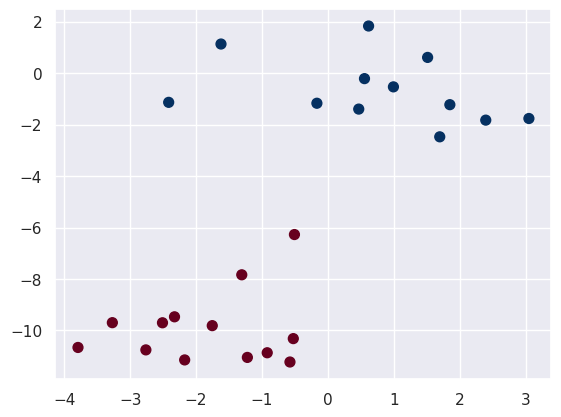

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu');

Loss:14.943 ||W||=1.139, Acc:0.88
Loss:0.0 ||W||=0.144, Acc:1.0
ZERO loss
Acc.: 1.0


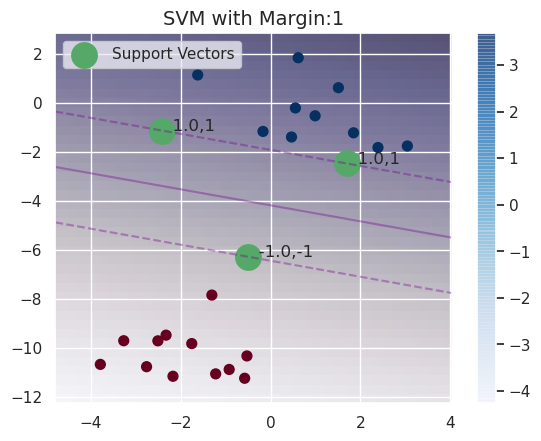

In [4]:
class SVM:
    def __init__(self,margin=1,C=2,reg=0,lr=.0001,iteration=10**6):
        self.margin=margin
        self.C=C
        self.reg=reg
        self.lr=lr
        self.w=None
        self.iteration=iteration
        
    def compute_hinge_loss(self):
        # err=1-(Y * (Xw))
        # derr=-YW
        z=self.y*(self.X@self.w)
        hinge_loss=np.maximum(self.margin-z,0)
        idx=np.where(hinge_loss > 0)
        dh_loss=-self.y[idx].T@self.X[idx]
        return hinge_loss,dh_loss
    
    def svm_loss(self):
        # (1) Compute the hingle loss
        hinge_loss, dhinge_loss=self.compute_hinge_loss()
        # (2) Compute SVM loss: Hinge Loss + l2
        svm_loss=self.reg*(np.sum(self.w**2))+ self.C*hinge_loss.sum()        
        # (3) Compute the average the gradient of hinge loss
        dhinge_loss/=self.n
        dhinge_loss*=self.C
        # (4) Compute gradient of regularization
        dl2=self.reg*2*self.w
        # (5) Compute derivative of the loss w.r.t. w.
        dw=dhinge_loss+dl2

        return svm_loss, dw
    
    def fit(self,X,y):
        # (1) Add ones to input.
        self.X=np.hstack((X,np.ones((len(X),1))))
        # (2) Add bias into weights.
        self.w=np.random.randn(self.X.shape[1])
        self.y=y
        # (3) number of data points.
        self.n=len(self.X)
        # Convert 0 to -1.
        y[y==0]=-1
        
        for i in range(self.iteration):
            #(4) Compute SVM loss and Compute derivative of loss w.r.t. w.
            svm_loss,dw=self.svm_loss()
            # (5) Update w in the negative direction of derivative.
            self.w-=self.lr*dw    
            if i %(self.iteration//10)==0:
                print(f'Loss:{svm_loss:.5} ||W||={np.sqrt(self.w**2)[0]:.3f}, Acc:{(y==self.predict(X)).mean()}')
                
                if svm_loss==0:
                    print('ZERO loss')
                    break
        return self
    
    def decision_function(self,X):
        X=np.hstack((X,np.ones((len(X),1))))
        return X@self.w
    
    def predict(self,X):
        pred=(self.decision_function(X)>0)*1
        pred[pred==0]=-1
        return pred
    
    
    def plot_decision_boundary(self,X,y):
        fig, ax = plt.subplots()
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu')
        ax.set_title(f'SVM with Margin:{self.margin}', size=14)
        
        xx_min,xy_min=X.min(axis=0)
        xx_max,xy_max=X.max(axis=0)

        # Visualization works perfectly
        xlim,ylim = (xx_min-1, xx_max+1), (xy_min-1, xy_max+1)
        xg = np.linspace(xlim[0], xlim[1], 60)
        yg = np.linspace(ylim[0], ylim[1], 40)
        xx, yy = np.meshgrid(xg, yg)
        Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
        for label, color in enumerate(['red', 'blue']):
            Pm=self.decision_function(Xgrid)
            c=ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
            ax.contour(xx, yy, Pm.reshape(xx.shape),levels=[-self.margin,0,self.margin],
                       colors=color,linestyles=['--', '-', '--'],alpha=0.2)
        fig.colorbar(c, ax=ax)
        
        
        P=self.decision_function(X)
        self.support_vectors_=X[(np.where((P <1.1) & (P >-1.1)))]
    
        
        ax.set(xlim=xlim, ylim=ylim)
        
        
        plt.scatter(self.support_vectors_[:, 0],self.support_vectors_[:, 1],s=300, linewidth=2, facecolors='g',label='Support Vectors');
        
        pred=self.decision_function(X)
        for i in range(len(X)):
            if -1.1<pred[i]<1.1:
                plt.annotate(f'  {pred[i]:.3},{y[i]}',xy=(X[i]))
        plt.legend()
        plt.show()
        
svm=SVM().fit(X,y)
print('Acc.:',(y==svm.predict(X)).mean())
svm.plot_decision_boundary(X,y)

[(-22.449757369384596, 6.095997544753922),
 (-22.449757369384596, 6.095997544753922)]

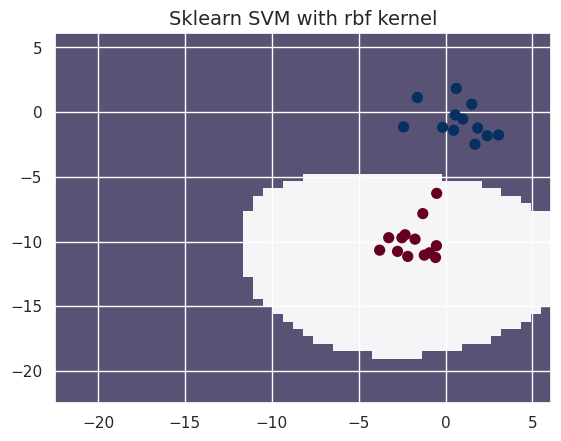

In [5]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Sklearn SVM with rbf kernel', size=14)

# Visualization works perfectly
xlim,ylim = (X.min()*2, X.max()*2), (X.min()*2, X.max()*2)
xg = np.linspace(xlim[0], xlim[1], 50)
yg = np.linspace(ylim[0], ylim[1], 50)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    Pm= clf.predict(Xgrid)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,cmap=color.title() + 's')
    #ax.contour(xx, yy, P.reshape(xx.shape),levels=[.2,1],colors=color, alpha=0.2)
ax.set(xlim=xlim, ylim=ylim)